In [2]:
import pandas as pd 
# default='warn', Used here to supress warning when slicing and creating high earners column
pd.options.mode.chained_assignment = None 


In [3]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
# custom function from Web_scrapper_League_Tables notebook 
from ipynb.fs.full.Web_scrapper_League_Tables import League_table_scraper


#### Getting data from the API

In [5]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/de/1-bundesliga/2019-2020/'

# Retrieve json
json1 = requests.get(endpoint, headers = headers).text

#Data for 2019/2020
df1 = pd.read_json(json1)

df1 = df1[df1["season_term"] == "combined"]

In [6]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/de/1-bundesliga/2020-2021/'

# Retrieve json
json2 = requests.get(endpoint, headers=headers).text

#Data for 2020/2021
df2 = pd.read_json(json2)

df2 = df2[df2["season_term"] == "combined"]

In [7]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/de/1-bundesliga/2021-2022/'

# Retrieve json
json3 = requests.get(endpoint, headers=headers).text

#Data for 2021/2022
df3 = pd.read_json(json3)

df3 = df3[df3["season_term"] == "combined"]

In [8]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/de/1-bundesliga/2022-2023/'

# Retrieve json
json4 = requests.get(endpoint, headers=headers).text

#Data for 2022/2023
df4 = pd.read_json(json4)

#Capology has defined the seson as summer
df4 = df4[df4["season_term"] == "summer"]

In [9]:
df = pd.concat([df1,df2,df3,df4],axis = 0).drop_duplicates()

In [11]:
player_group

0       Forward
5        Keeper
6       Forward
10       Keeper
12      Forward
         ...   
503      Keeper
504      Keeper
505     Defense
506     Defense
507    Midfield
Name: player_group, Length: 2210, dtype: object

#### Cleaning Data frame

In [88]:
df = df[df['salary_gross_eur'] != 0]

In [89]:
CODE_DICT = pd.Series(df.club_code.values,index=df.club_name).to_dict()


In [90]:
#Required columns
LIST = ['season_id','club_code','player_age','player_country_id','player_group_code','salary_gross_eur']

In [91]:
df_salary = df[LIST]
df_salary = df_salary.reset_index(drop = True)

In [92]:
df_salary.head()

,season_id,club_code,player_age,player_country_id,player_group_code,salary_gross_eur
0,2019-2020,AUG,30,iceland,F,1990000
1,2019-2020,AUG,32,germany,K,360000
2,2019-2020,AUG,29,germany,F,1800000
3,2019-2020,AUG,20,germany,K,80000
4,2019-2020,AUG,24,ecuador,M,1500000


#### Finding High Earners

In [93]:
# Group the data by 'club' and 'position'
groups = df_salary.groupby(['season_id','club_code', 'player_group_code'])
# Find the highest two values of column 'salary_gross_eur' for each group
top_two = groups['salary_gross_eur'].nlargest(2).reset_index()

# get needed indexes
index = list(top_two['level_3'])

# Add the result to the data frame as a new column
df_salary['high_earner'] = 0
for i in index:
    df_salary.loc[i, 'high_earner'] = 1

#### Creating  needed features

In [94]:
countries = df_salary.player_country_id.unique()

#based on uk.gov website excluding Germany
EU_countries = ['Austria', 'Bulgaria','Belgium', 'Croatia','Cyprus', 'Czech-Republic', 
              'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Italy',
              'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
              'Romania', 'Slovakia', 'Slovenia', 'Spain','Sweden']

EU_countries = [s.lower() for s in EU_countries]

In [95]:
EU = []
non_EU = []
for country in countries:
    if country in EU_countries:
        EU.append(country) 
    elif country == 'germany':
        0
    else:
        non_EU.append(country) 


In [96]:
len(countries)-len(EU)-len(non_EU)

1

In [97]:
def set_region(row):
    """
    Function takes each row as argument and returns the region 
    based on the player_country_id.
    """
    
    if row['player_country_id'] in non_EU:
        return 'non_EU'
    
    elif row['player_country_id'] in EU:
        return 'EU'
    
    else:
        return 'germany'

In [98]:
##Updating coding dicitionary as capology has differnt naming convention to Wikipedia
CODE_DICT = pd.Series(df.club_code.values,index=df.club_name).to_dict()

CODE_DICT['1. FC Köln'] = 'CGN'
CODE_DICT['Borussia Mönchengladbach'] = 'BMG'
CODE_DICT['RB Leipzig'] = 'RBL'
CODE_DICT['1899 Hoffenheim'] = 'TSG'
CODE_DICT['VfL Wolfsburg'] = 'WOB'
CODE_DICT['SC Freiburg'] = 'SCF'
CODE_DICT['Hertha BSC'] = 'BSC'
CODE_DICT['Mainz 05'] = 'MAI'
CODE_DICT['FC Augsburg'] = 'AUG'
CODE_DICT['Fortuna Düsseldorf'] = 'F95'
CODE_DICT['SC Paderborn'] = 'PAD'
CODE_DICT['VfB Stuttgart'] = 'STU'
CODE_DICT['VfL Bochum'] = 'BCM'
CODE_DICT['Greuther Fürth'] = 'FUR'
CODE_DICT['Borussia Mönchengladbach'] = 'BMG'

In [99]:
# Final league standings 2019/2020
standings_2019 = League_table_scraper('https://en.wikipedia.org/wiki/2019%E2%80%9320_Bundesliga',6)
standings_2019 = list(map(lambda x: CODE_DICT[x], standings_2019.club))

# Final league standings 2020/2021
standings_2020 = League_table_scraper('https://en.wikipedia.org/wiki/2020%E2%80%9321_Bundesliga',6)
standings_2020 = list(map(lambda x: CODE_DICT[x], standings_2020.club))

# Final league standings 2021/2022
standings_2021 = League_table_scraper('https://en.wikipedia.org/wiki/2021%E2%80%9322_Bundesliga',5)
standings_2021 = list(map(lambda x: CODE_DICT[x], standings_2021.club))

# Current league standings 2022/2023
standings_2022 = League_table_scraper('https://en.wikipedia.org/wiki/2022%E2%80%9323_Bundesliga',5)
standings_2022 = list(map(lambda x: CODE_DICT[x], standings_2022.club))

In [100]:
def set_club_type(row):
    
    """
    Function takes each row as argument and returns
    top 4,top 6,mid-table, relagation based on the club 
    finishing position for the year
    
    """

    if (row['club_code'] in standings_2019[:4] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[0:4] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[0:4] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[0:4] and row['season_id']=='2022-2023'):
        return 'top 4'
   
    if (row['club_code'] in standings_2019[4:6] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[4:6] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[4:6] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[4:6] and row['season_id']=='2022-2023'):
        return 'top 6'
    
    if (row['club_code'] in standings_2019[6:15] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[6:15] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[6:15] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[6:15] and row['season_id']=='2022-2023'):
        return 'mid-table'
    
    else :
        return 'relegation'


In [101]:
X = df_salary[['club_code', 'player_age', 'player_country_id', 'player_group_code','season_id','high_earner']]

X = X.assign(Age = pd.cut(X['player_age'], 
                               bins = [0, 17, 21,23, 27, 32,99], 
                               labels = ['U18', '18-21', '21-23','23-27','27-32','32+']))

X = X.assign(region = X.apply(set_region, axis = 1)).astype('category')

X = X.assign(club_level = X.apply(set_club_type,axis = 1)).astype('category')

X = X.drop('player_country_id',axis=1)
X = X.drop('player_age',axis=1)
X = X.drop('season_id',axis=1)

#### Preapring data frame for modelling


In [102]:
X = pd.get_dummies(data = X, drop_first = True)

In [103]:
Y = np.log(df_salary['salary_gross_eur'])

#### Fiiting the Model

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1323, 35)
(882, 35)
(1323,)
(882,)


In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [106]:
X_test.to_csv(r'C:\Users\Ramya\X_test_de.csv')

In [107]:
print(model.intercept_)

10.30098430421953


In [108]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']).reset_index()
coeff_parameter

,index,Coefficient
0,club_code_AUG,1.008123
1,club_code_B04,2.088195
2,club_code_BAY,2.963334
3,club_code_BCM,0.293283
4,club_code_BMG,1.694825
5,club_code_BSC,1.246148
6,club_code_BVB,2.326512
7,club_code_CGN,0.938179
8,club_code_F95,0.401456
9,club_code_FUR,0.420679


#### Model Evaluation

In [109]:
predictions = model.predict(X_test)
predictions

array([12.83942252, 10.89237527, 13.05881309, 15.03473932, 15.60962519,
       15.48999258, 13.60188328, 13.8007035 , 12.58720052, 13.22980384,
       10.17904698, 12.92172115, 12.84737944, 13.3752441 , 15.30594806,
       13.72971722, 11.35495405, 14.24230314, 15.06682903, 13.23181513,
       14.82998046, 11.83055461, 10.88905194, 12.44547794, 14.73604319,
       13.63855702, 13.02113586, 12.78506182, 14.03883008, 13.43892021,
       13.73665711, 13.91187451, 12.90163042, 11.86692907, 11.46761891,
       14.94630585, 15.00053253, 14.55536552, 13.13372086, 13.97343949,
       13.84560554, 13.13785614, 13.66469479, 12.57966616, 13.81257898,
       14.18976204, 12.13852304, 15.3560335 , 13.73453664, 13.38239287,
       13.56369255, 14.79277325, 13.2102921 , 13.62170048, 12.51555515,
       13.39665445, 14.13941048, 10.94053744, 14.50298802, 16.47156346,
       13.98644975, 13.27762304, 13.48779791, 14.66584834, 15.13708787,
       13.517247  , 13.2102921 , 12.45390885, 15.34944584, 14.37

C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary_gross_eur'>

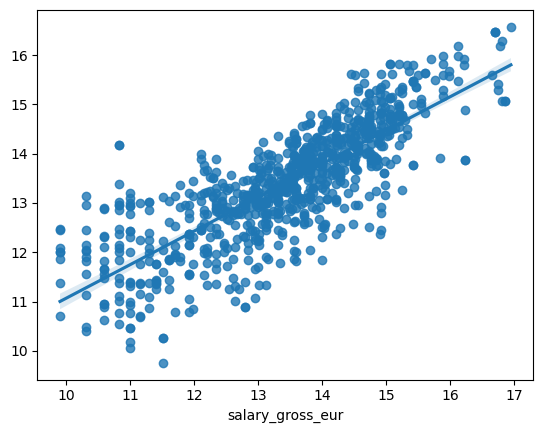

In [110]:
sns.regplot(y_test,predictions)

In [111]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:       salary_gross_eur   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     74.56
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          1.09e-280
Time:                        14:13:47   Log-Likelihood:                -1623.8
No. Observations:                1323   AIC:                             3320.
Df Residuals:                    1287   BIC:                             3506.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.30

C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='salary_gross_eur'>

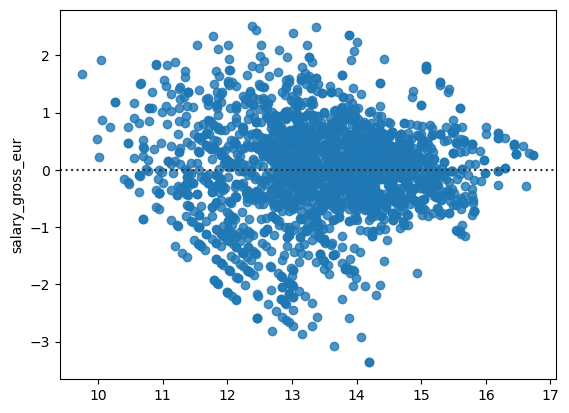

In [115]:
sns.residplot(model.predict(X), Y)

#### Model Export

In [112]:
import pickle
pickle.dump(model, open('model_de.pkl','wb')) 